In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from itertools import product
from pathlib import Path
from sys import platform
import matplotlib.pyplot as plt

In [3]:
def replace_slash(s):
    return s.replace("\\", "/")

def my_dataset_iter(df, names):
    if len(names) == 0:
        yield (df,)
        return
    name = names[0]
    for value in df[name].unique():
        df_tmp = df[df[name]==value]
        for tpl in my_dataset_iter(df_tmp, names[1:]):
            yield (value,)+tpl

In [19]:
prefix = r"\home\stamm\projects"
paths=(
#    [
#    prefix+fr"\graph_description\snakemake_base\experiments\agg_train_per_class\{dataset}_planetoid\round_{round}\score_accuracy\split_crange(200)_500_rest_range(20)\xgbclass_10_2_0_10.csv"
#    for dataset, round in product(["pubmed", "citeseer"], [0, 1])
#] + [
#    prefix+fr"\graph_description\snakemake_base\experiments\agg_train_per_class\{dataset}_planetoid\baselines\score_accuracy\split_crange(200)_500_rest_range(20)\{gnn_kind}_0_0.csv"
#    for dataset, gnn_kind in product(["pubmed", "citeseer"], ["gat2017", "gcn2017"])
#] +[
#    prefix+fr"\graph_description\snakemake_base\experiments\agg_train_per_class\{dataset}_planetoid\round_{round}\score_accuracy\split_crange(201)_500_rest_range(20)\xgbclass_200_2_0_10.csv"
#    for dataset, round in product(["pubmed"], [0,1])
#] + [
#    prefix+fr"\graph_description\snakemake_base\experiments\agg_train_per_class\{dataset}_planetoid\round_{round}\score_accuracy_train\split_crange(201)_500_rest_range(20)\xgbclass_200_2_0_10.csv"
#    for dataset, round in product(["pubmed"], [0,1])
#]+ [
#    prefix+fr"\graph_description\snakemake_base\experiments\agg_train_per_class\{dataset}_planetoid\baselines\score_accuracy_train\split_crange(201)_500_rest_range(20)\{gnn_kind}_0_0.csv"
#    for dataset, gnn_kind in product(["pubmed"], ["gat2017", "gcn2017"])
#] +[
#    prefix+fr"\graph_description\snakemake_base\experiments\agg_train_per_class\{dataset}_planetoid\round_{round}\score_accuracy\split_crange(201)_500_rest_range(10)\xgbclass_1000_2_0_100.csv"
#    for dataset, round in product(["pubmed",  "citeseer"], [0,1])
#] + [
        [prefix.replace("\\", "/")+"/graph_description/snakemake_base/experiments/agg_train_per_class/pubmed_planetoid/round_1/score_accuracy/split_crange(201)_500_rest_range(5)/rulefit.csv"]
#    ] + [
#        r"/home/stamm/projects/graph_description/snakemake_base/experiments/agg_train_per_class/pubmed_planetoid/baselines/score_accuracy/split_crange(5,201)_500_rest_0/gcn2017_0_0_opti(0 100).csv",
#        r"/home/stamm/projects/graph_description/snakemake_base/experiments/agg_train_per_class/citeseer_planetoid/round_0/score_accuracy/split_crange(5,201)_500_rest_range(20)/xgbclass_opti(0,100).csv",
#        r"/home/stamm/projects/graph_description/snakemake_base/experiments/agg_train_per_class/citeseer_planetoid/baselines/score_accuracy/split_crange(201)_500_rest_range(20)/gat2017_0_0_opti(0,100).csv",
#    ] + [
    +[
        f"/home/stamm/projects/graph_description/snakemake_base/experiments/agg_train_per_class/{dataset}_planetoid/round_{round}/score_accuracy{the_set}/split_crange(5,201)_500_rest_range(20)/{classifier}_opti(0,100).csv"
        for dataset,round, classifier, the_set in product(["citeseer", "cora", "pubmed"], [0,1,2], ["xgbclass", "sgdclassifier"], ["", "_train", "_val"])
    ]

    + [
        f"/home/stamm/projects/graph_description/snakemake_base/experiments/agg_train_per_class/{dataset}_planetoid/baselines/score_accuracy{the_set}/split_crange(5,201)_500_rest_range(20)/{classifier}_opti(0,100).csv"
        for dataset, classifier, the_set in product(["citeseer", "cora", "pubmed"],["gat2017_0_0", "gcn2017_0_0"], ["", "_train", "_val"])
    ] + [
        f"/home/stamm/projects/graph_description/snakemake_base/experiments/agg_train_per_class/{dataset}_citationfull/round_{round}/score_accuracy{the_set}/split_crange(5,201)_500_rest_range(20)/{classifier}_opti(0,100).csv"
        for dataset,round, classifier, the_set in product(["citeseer", "pubmed", "dblp"], [0,1,2], ["xgbclass", "sgdclassifier"], [""])
    ] + [
        f"/home/stamm/projects/graph_description/snakemake_base/experiments/agg_train_per_class/{dataset}_citationfull/baselines/score_accuracy{the_set}/split_crange(5,201)_500_rest_range(20)/{classifier}_opti(0,100).csv"
        for dataset, classifier, the_set in product(["citeseer", "pubmed", "dblp", "cora", "cora_ml"], ["gat2017_0_0", "gcn2017_0_0"], [""])
    ]
)


#+ [
#  prefix+fr"\projects\graph_description\snakemake_base\experiments\agg_train_per_class\{dataset}_None\round_{round}\score_accuracy\split_auto_0_rest_10\xgbclass_{n_class}_2_0.csv"
#    for dataset, round, n_class in product(["pubmed"], [0,1,2], [100])  
#    ] + [
#    prefix+fr"\projects\graph_description\snakemake_base\experiments\agg_train_per_class\{dataset}_None\round_{round}\score_accuracy\split_auto_0_rest_10\xgbclass_{n_class}_2_0.csv"
#    for dataset, round, n_class in product(["citeseer"], [0,1], [100]) 
#]
if platform == "linux" or platform == "linux2":
    paths = [replace_slash(p) for p in paths]
paths = list(map(Path, paths))

In [20]:
dfs = [pd.read_csv(path) for path in paths]
df = pd.concat(dfs, axis=0)
df = df.reset_index(drop=True)

In [21]:
import re
split_seed_patter = re.compile(r"split_\d+_\d+_(?:rest|\d+)_(\d+)")
def split_seed_from_path(s):
    return int(split_seed_patter.search(s).group(1))

In [22]:
df["split_seed"]=df["path"].map(split_seed_from_path)

In [23]:
def extract_num_train_from_path(s):
    return int(s.split("split_")[1].split("/xgbclass")[0].split("_")[0])
def extract_split_id_from_path(s):
    return int(s.split("split_")[1].split("/xgbclass")[0].split("_")[3])

In [24]:
df["train_per_class"] = df["path"].map(extract_num_train_from_path)
df = df.drop(["path"],axis=1)

In [25]:
# remove seed 0, essential for runs with hyper parameter optimization!
# because hyper params were optimized on split 0
df_filt= df[df["split_seed"]!=0]

In [33]:
agg_method="median"
df_agg = df_filt.drop(["split_seed", "dyn_num_train_per_class", "num_test", "dyn_split_seed"],axis=1).groupby(["group", "dataset", "round", "score_name", "joker", "train_per_class"]).agg([agg_method, "std"]).reset_index()

In [37]:
def my_plot(df, y_column, x_lim=None, y_lim=None, show_error=False):
    colors = {10:"blue", 100:"red", "/xgbclass_10_2_0_10":"red",
              '/gat2017_0_0':"gray",
              '/gcn2017_0_0': "darkgreen",
              '/xgbclass_200_2_0_10':"blue",
             '/xgbclass_1000_2_0_100': "orange",
             "/rulefit":"lawngreen",
             "/gcn2017_0_0_opti(0 100)":"aqua",
             "/xgbclass_opti(0,100)": "red",
             '/gat2017_0_0_opti(0,100)':"fuchsia",
             '/gcn2017_0_0_opti(0,100)':"gold",
             '/sgdclassifier_opti(0,100)':"blue"}
    linestyles = {"round_1":"--", "round_2":":", "round_0":"-", "baselines":"-"}
    for dataset, group, df0 in my_dataset_iter(df, ["dataset", "group"]):
        num_metric=len(np.unique(df["score_name"]))
        if num_metric != 1:
            fig, axs = plt.subplots(1, num_metric, sharey=True, figsize=(num_metric*6, 4.5))
            i=-1
        i=-1
        for metric, df1 in my_dataset_iter(df0, ["score_name"]):
            #print("metric", metric)
            i+=1
            if num_metric == 1:
                fig = plt.figure()
            else:
                plt.sca(axs[i])
            x_max=1
            y_max=0.1
            for round, n_estimators, df2 in my_dataset_iter(df1, ["round", "joker"]):
                plt.title(f"{dataset} {group}")
                x = df2["train_per_class"]
                kwargs = dict(
                    label=f"{round}, esti={n_estimators}",
                    linestyle=linestyles[round],
                    color=colors[n_estimators]
                )
                if show_error:
                    plt.errorbar(x, df2[y_column][agg_method], yerr=df2[y_column]["std"], **kwargs)
                else:
                    plt.plot(x, df2[y_column][agg_method],**kwargs)
                plt.xlabel("num_train_per_class")
                plt.ylabel(f"{agg_method} {metric}")
                x_max = max(df2["train_per_class"].max(), x_max)
                y_max = max(df2[y_column][agg_method].max(), y_max)
    
            #mu, sigma = get_baseline(dataset)
            #tpc_public = train_per_class_public(dataset)
            
            #x = np.linspace(1,x_max)
            #y_1 = np.ones(len(x))
            #plt.plot(x,y_1*mu, color="k", label=f"GCN train/class={tpc_public}")
            #plt.plot(x,y_1*(mu-sigma), color="k", linestyle=":")
            #plt.plot(x,y_1*(mu+sigma), color="k", linestyle=":")
            #plt.axvline(tpc_public, 0,1, color="gray", zorder=0)
            
            #print(plt.ylim())
            if not x_lim is None:
                plt.xlim(x_lim)
            if not y_lim is None:
                plt.ylim(y_lim)
            
            plt.grid()
        plt.legend()
        plt.show()

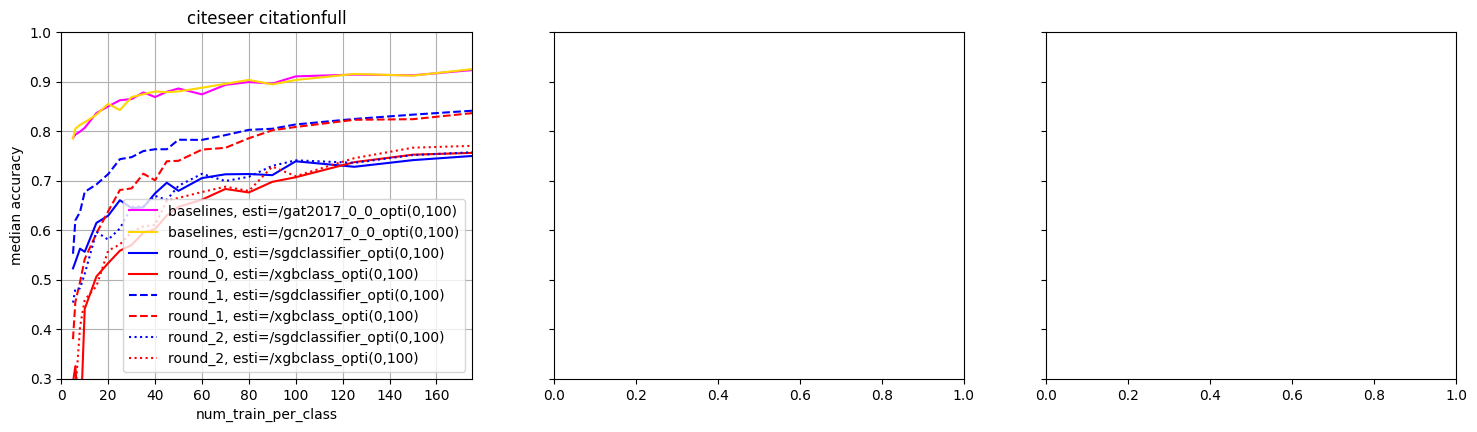

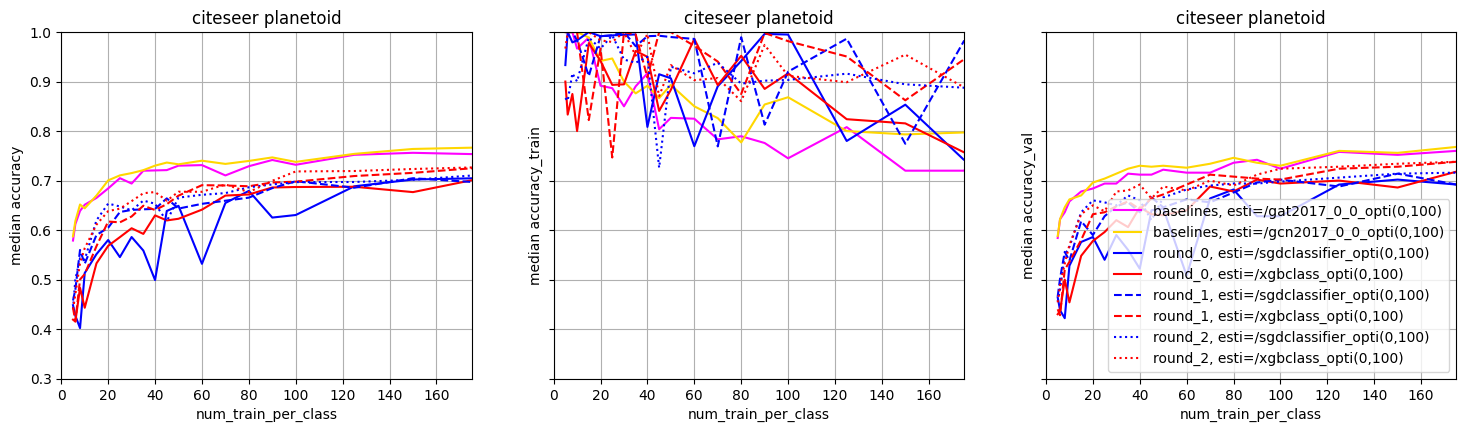

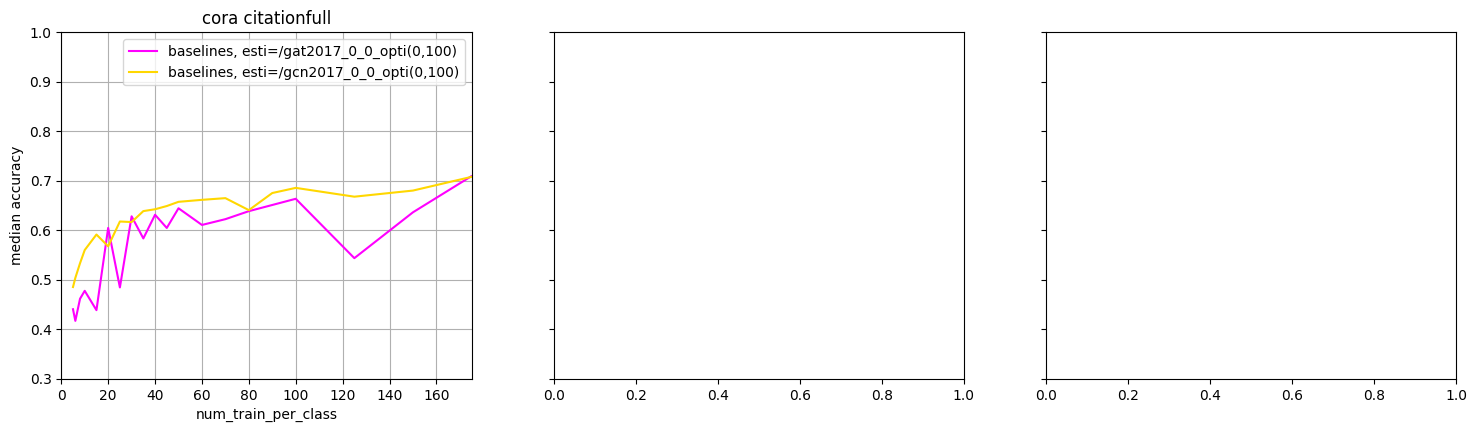

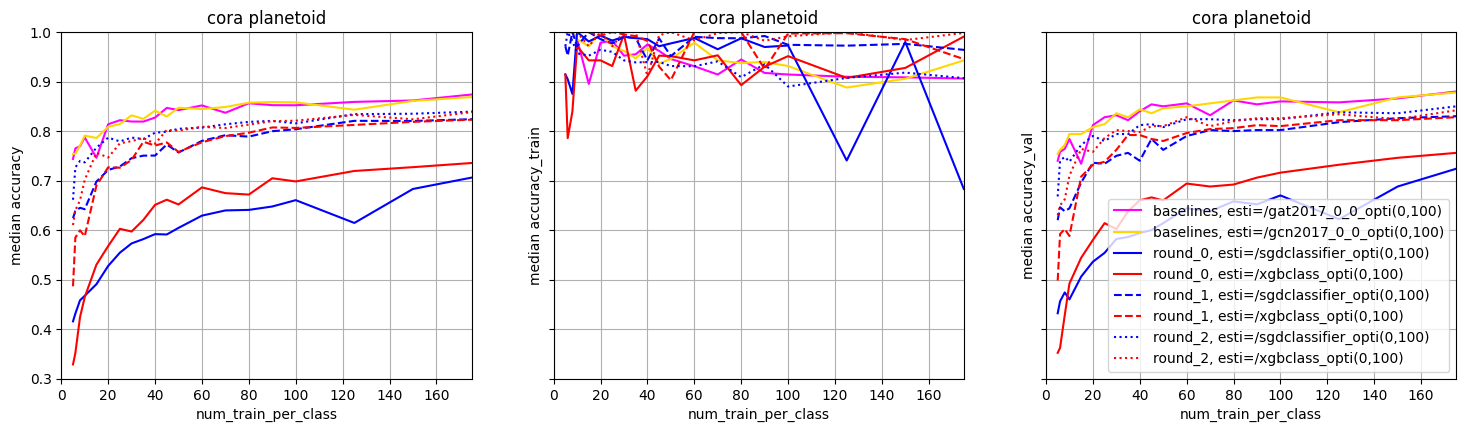

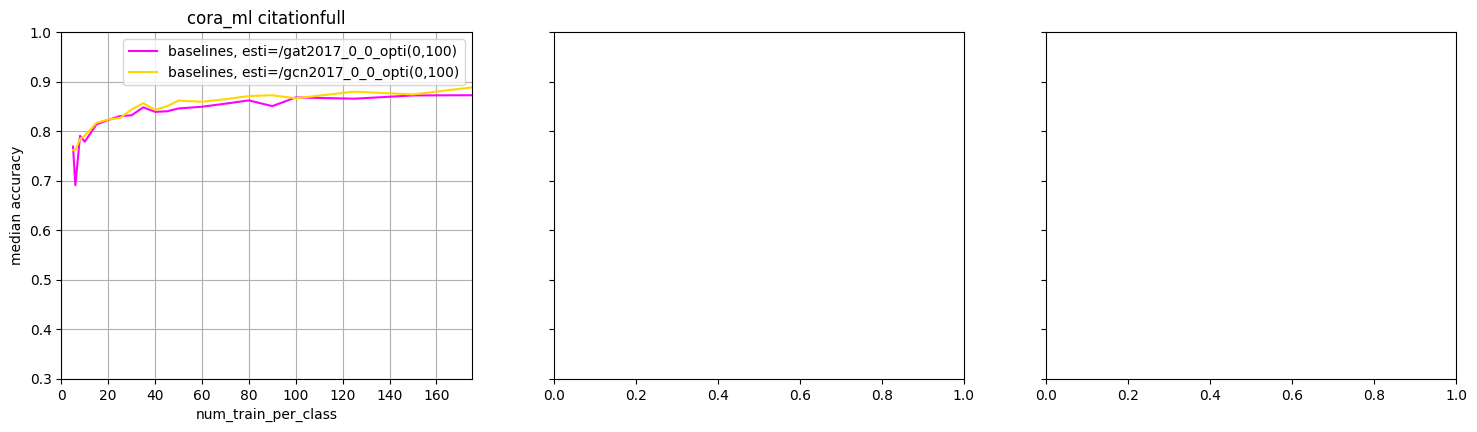

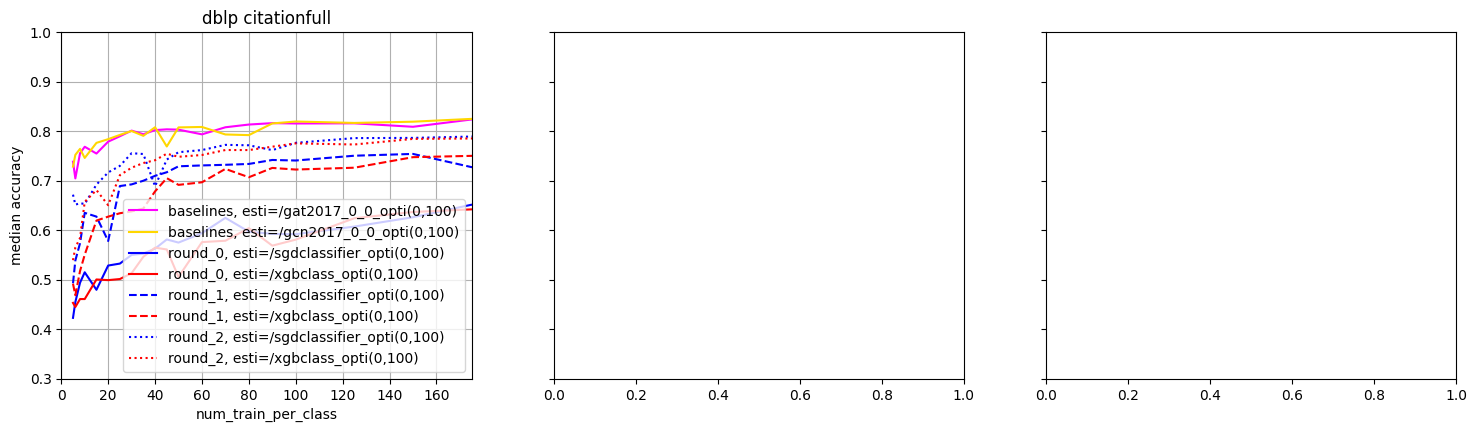

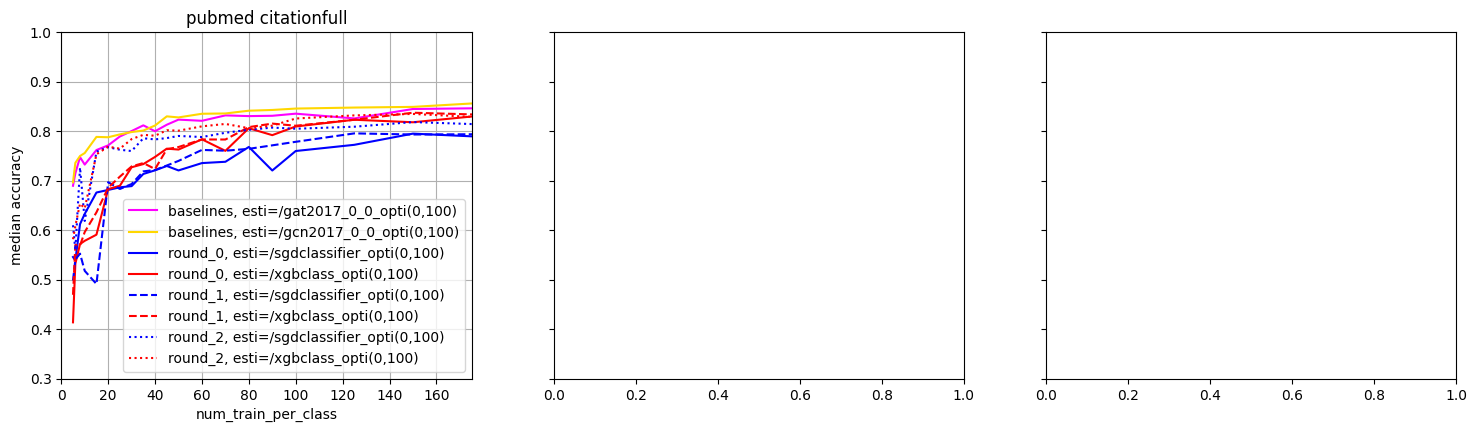

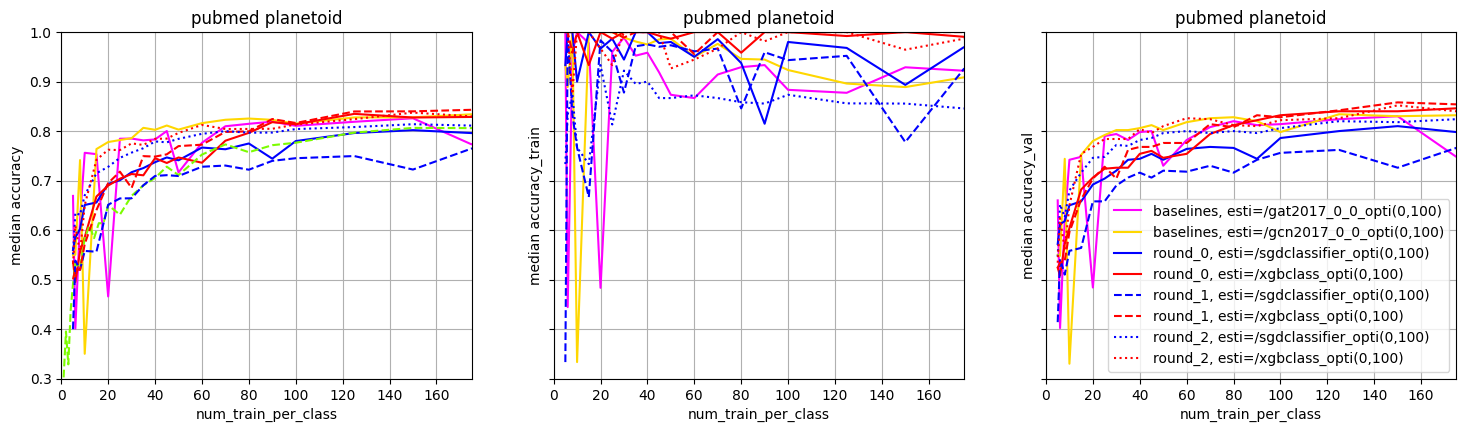

In [40]:
my_plot(df_agg, "value", x_lim=(0,175), y_lim=(0.3,1.0), show_error=False)

# Possible things to do

- use training-labels to generate features
- centralities as training features
- use random projections plus simple classifiers 
- use a different simple classifier (multi layer neural net)?
- (FIX) data leakage

# Paper structure

- simple classifiers+feature message passing is competitive (on some datasets, with enough training examples)
- 
- use simple classifier to predict label ouput
  1) train simple classifiers on GNN output labels
  2) train simple classifier/regressor on GNN softmax output
- posthoc explanation of classifier predictions with subgroup discovery
  fit pysubgroup rules on on GNN output -> show resulting rules
  use various classes to be predicted
  predicting the mispredictions (where is the gat prediction different from the GT labels)
  